# Codeschool - Introduction to plotting with Plotly in Python

GitHub doesn't render Plotly plots natively - but you can view this notebook with the interactive plots through nbviewer: https://nbviewer.org/

In [6]:
# Set renderer so Plotly plots show on nbviewer
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Import package to display image later
from IPython.display import Image

# Import pandas for dataframes
import pandas as pd

### What is Plotly?

Plotly is an interactive and open-source plotting library which has over 40 chart types. These are rendered using the plotly.js JavaScript library, though we'll be talking about the Python package here (no need to interact directly with JavaScript). You can also use Plotly in R!

### Why is Plotly useful?

* Quick and easy to make graphs (low code/effort)
* Very customisable
* Can create interactive plots, which is useful when:
    * You want to be able to turn certain data series on and off
    * You want to be able to zoom into certain parts
    * You want to be able to identify specific data points and their values by hovering over them
    * You want to be able to save plots either as they are or after modifying them as above
    * You want to make pretty plots that look fancy to impress people

### Creating figures

* With `plotly.express` for simple, quick plots (`px`)
* With `plotly.graph_objects` for more customisation (`go`)
* With `plotly.figure_factory` (more advanced)
* With plotly and Dash (e.g. for a dynamic dashboard).
    * Not covered here, for more info: https://dash.plotly.com/

### Format of a Plotly figure

3 main components:
1. Data: List of dictionaries which sets the graph type and holds the data itself
    - Data + type = a trace, can be multiple per plot
2. Layout: Dictionary which controls the style of the figure (one per figure)
3. Frames: relevant for animated plots

In [1]:
# Import Plotly express
import plotly.express as px

### A simple univariate plot

In [2]:
# Create a simple line chart, manually specify X and Y values
simple_fig = px.line(x=['a', 'b', 'c'], y=[2, 4, 9])

simple_fig.show()

In [3]:
# This is what the underlying data structure is like
print(simple_fig)

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array(['a', 'b', 'c'], dtype=object),
              'xaxis': 'x',
              'y': array([2, 4, 9]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


### Plot examples with palmers penguins

In [4]:
# We're going to use the palmerpenguins dataset. 
# More info: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
# Can install this dataset easily with:

# pip install palmerpenguins

# Load dataset
from palmerpenguins import load_penguins

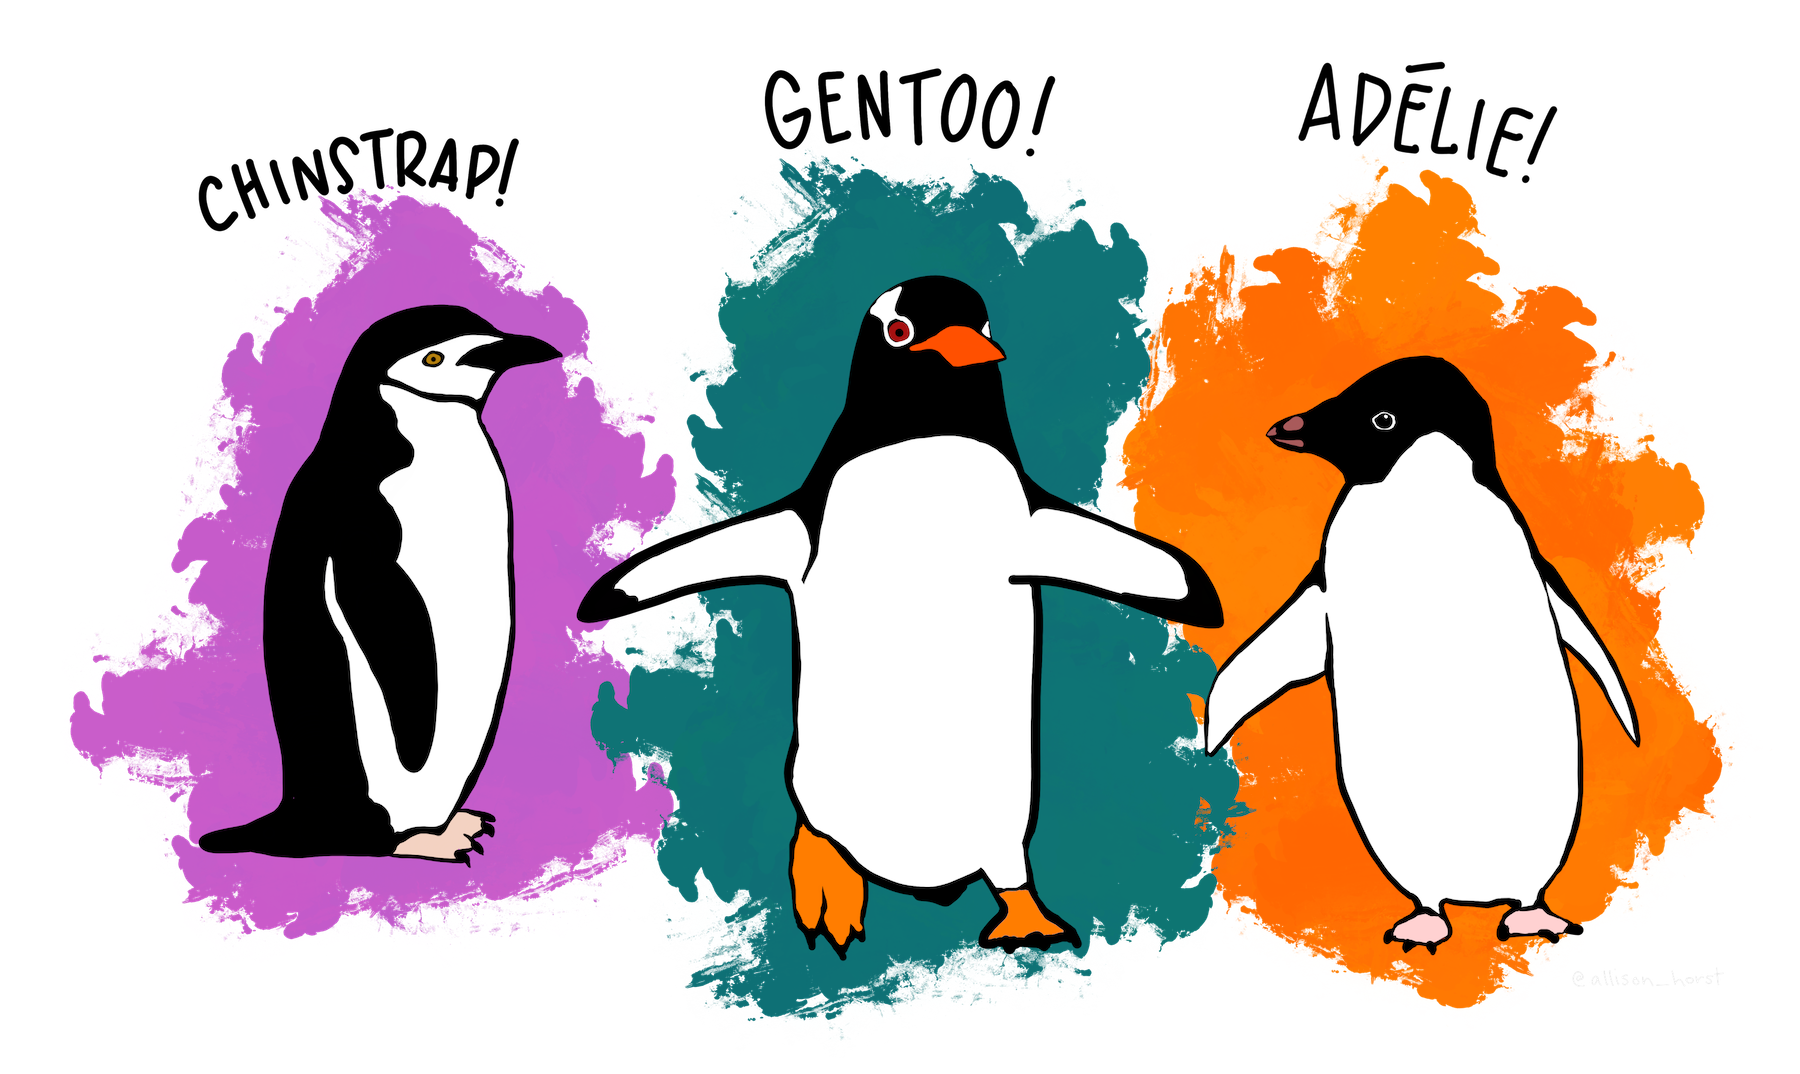

In [7]:
Image(filename='palmer_penguins.png')

In [8]:
# Take a look at what the penguins dataset looks like
penguins = load_penguins()
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0    male  2007  
1         3800.0  female  2007  
2         3250.0  female  2007  
3            NaN     NaN  2007  
4         3450.0  female  2007  
..           ...     ...   ...  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  

[344 rows x 8 columns]

8 columns:
* *species*: penguin species (Chinstrap, Adélie, or Gentoo)
* *island*: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* *bill_length_mm*: bill length (mm)
* *bill_depth_mm*: bill depth (mm)
* *flipper_length_mm*: flipper length (mm)
* *body_mass_g*: body mass (g)
* *sex*: penguin sex
* *year*: year data were collected


### plotly.express

`plotly.express` contains functions to create entire figures at once and is recommended to create most common figures. These figures can also be created using `plotly.graph_objects` but require 5-100x more code.

### Simple bar chart - count of penguins by sex, grouped by species

In [9]:
species_count = px.bar(
    penguins,
    x='species',
    color='sex',
    barmode='group'
)

species_count.show()

### Bar chart of penguins by island, coloured and grouped by species

In [10]:
# Use facet_row to add subplots
counts = px.bar(
    penguins,
    y='island',
    facet_row='species',
    color='species',
    pattern_shape='species'
)

counts.show()

### Simple box and whisker plot - penguin bill length distribution by sex

In [11]:
bill_length = px.box(
    penguins,
    x='sex',
    y='bill_length_mm'
)

bill_length.show()

### Customising titles with fig.update_layout()

In [12]:
# Update the main title text, centre the title to the middle
# Update the axes titles text
bill_length.update_layout(
    title={
        'text': 'Bill length distribution by sex',
        'xanchor': 'center',
        'x': 0.5
    },
    xaxis_title="Sex",
    yaxis_title="Bill length (mm)"
)
bill_length.show()

### Violin plots - distribution of flipper length by sex and island

In [13]:
# Use points='all' to include all points next to each violin
violin_plot = px.violin(
    penguins,
    x='sex',
    y='flipper_length_mm',
    color='island',
    points='all'
)

violin_plot.show()

### Scatter plot - flipper length vs body mass

In [14]:
# Plot flipper length against body mass by species
scatter_plot = px.scatter(
    penguins,
    x='flipper_length_mm',
    y='body_mass_g',
    color='species'
)

scatter_plot.show()

### Customising colour

You can specify your own colours to use, or you can use in-built colour scales provided by Plotly. More info here: https://plotly.com/python/builtin-colorscales/ and https://plotly.com/python/discrete-color/

In [15]:
# Map the colour of the species to our own specified RGB colour codes,
# hex codes or simple text
colour_discrete_map = {
    'Adelie': 'rgb(255,0,127)',
    'Gentoo': '#66FF00',
    'Chinstrap': 'darkorange'
}

In [19]:
# Use our own colours as color_discrete_map
# Also use our own point symbols for each species
# Use symbol_map to specify which symbols for which species
colour_map = px.scatter(
    penguins,
    x='flipper_length_mm',
    y='body_mass_g',
    color='species',
    color_discrete_map=colour_discrete_map,
    symbol='species',
    symbol_map={
        'Adelie': 'circle',
        'Gentoo': 'square',
        'Chinstrap': 'triangle-up'
    }
)

# Change size of the symbols
colour_map.update_traces(
    marker=dict(size=8)
)

colour_map.show()

### In-built continous diverging colour scales

In [17]:
diverging_continuous_scales = px.colors.diverging.swatches_continuous()
diverging_continuous_scales.show()

### In-built discrete colour palettes

In [18]:
qualitiative_colours = px.colors.qualitative.swatches()
qualitiative_colours.show()

### Using in-built discrete colours with color_discrete_sequence, adding extra hover text and adding a trendline

In [19]:
# Add island the penguin belongs to in the hover data
# Set the colour sequence to be in-built Pastel palette
# Add a ordinary least squares regression line and make the scope of the line
# overall, rather than just 3 separate lines
inbuilt_plotly = px.scatter(
    penguins,
    x='flipper_length_mm',
    y='body_mass_g',
    color='species',
    hover_data=['island'],
    color_discrete_sequence=px.colors.qualitative.Pastel,
    trendline="ols",
    trendline_scope="overall"
)

inbuilt_plotly.show()

### Other cool plotly.express plots

In [21]:
import numpy as np
# Remove NAs from dataframe otherwise sunburst won't work
cleaned_penguins = penguins.dropna()

# Create sunburst plot
sunburst_plot = px.sunburst(
    cleaned_penguins,
    path=['sex', 'species', 'island'],
    values='flipper_length_mm',
    color='body_mass_g',
    color_continuous_scale='RdBu',
    color_continuous_midpoint=np.average(
        cleaned_penguins['body_mass_g'],
        weights=cleaned_penguins['flipper_length_mm']
    )
)

sunburst_plot.show()

### Plotly Express (plotly.express)

In [ ]:
# plotly.express comes with data sets built-in

df = px.data.gapminder().query("country in ['Canada', 'Botswana']")

fig = px.line(df, x="lifeExp", y="gdpPercap", color="country", text="year")
fig.update_traces(textposition="bottom right")
fig.show()


### plotly.graph_objects

Sometimes `plotly.express` can't make very complicated plots and we need to use `plotly.graph_objects`, which uses slightly different syntax.

You can add multiple traces.
So more data on the same graph.

For each trace you can customise the mode and name.
i.e. just markers or just lines.

### Making subplots

In [34]:
from plotly.subplots import make_subplots

subplots_fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("My first plot", "My second plot")
)

subplots_fig.add_trace(
    go.Scatter(
        x=[1, 2, 3], y=[4, 5, 6]
    ),
    row=1, col=1
)

subplots_fig.add_trace(
    go.Scatter(
        x=[20, 30, 40], y=[50, 70, 60]
    ),
    row=1, col=2
)

### Multiple trace types

In [ ]:
import plotly.graph_objects as go
# Adding traces
# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines',
                    name='lines'))

fig.update_layout(
    title="Line and Scatter Plot",
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title"
    )

fig.show()

#### Plotting lots of data!
This is when zoom really helps to visualise.

In [ ]:
# Import Plotly graph objects
import plotly.graph_objects as go
import numpy as np

N = 100000
r = np.random.uniform(0, 1, N)
theta = np.random.uniform(0, 2*np.pi, N)

fig = go.Figure(data=go.Scattergl(
    x = r * np.cos(theta), # non-uniform distribution
    y = r * np.sin(theta), # zoom to see more points at the center
    mode='markers',
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()

Example of simple use of hover text

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig = go.Figure(data=go.Scatter(x=data['Postal'],
                                y=data['Population'],
                                mode='markers',
                                marker_color=data['Population'],
                                text=data['State'])) # hover text goes here

fig.update_layout(title='Population of USA States')
fig.show()

#### Adding error bars

Simple symetrical error bars (i.e. +/- 50%)

In [25]:
import plotly.graph_objects as go

# Load dataset
#from palmerpenguins import load_penguins
#penguins = load_penguins()
#penguins_adelei = penguins[penguins['species'] == 'Adelie']

data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")

fig = go.Figure(data=go.Scatter(x=data['Postal'],
                                y=data['Population'],
                                mode='markers',
                                marker_color=data['Population'],
                                text=data['State'], # hover text goes here
                                error_y=dict(
                                type='percent', # value of error bar given as percentage of y value
                                value=50,
                                visible=True)
                                ))

fig.update_layout(title='Population of USA States')
fig.show()


In [ ]:
# asymmetric error bars standard for all points

fig = go.Figure(data=go.Scatter(
        x=[1, 2, 3, 4],
        y=[2, 1, 3, 4],
        error_y=dict(
            type='percent',
            symmetric=False,
            value=15,
            valueminus=25)
    ))
fig.show()

#### Array of individual errors

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Control - no penguins',
    x=['Trial 1', 'Trial 2', 'Trial 3'], y=[3, 6, 4],
    error_y=dict(type='data', array=[1, 0.5, 1.5])
))
fig.add_trace(go.Bar(
    name='Experimental - with penguins',
    x=['Trial 1', 'Trial 2', 'Trial 3'], y=[4, 7, 3],
    error_y=dict(type='data', array=[0.5, 1, 2])
))
fig.update_layout(barmode='group',
                  title="Penguin Experiment Results",
                  yaxis_title="Measure of happiness",
                  )

fig.show()

### Example - TAT audit

In [22]:
# Read in a CSV of the audit information on each run
audit_df = pd.read_csv('run_info_2023-06-16_2023-07-07.csv')

In [23]:
# Take a look at the data in the dataframe
audit_df

assay_type                            run_name          upload_time  \
0         CEN       230623_A01295_0195_AHFCFVDRX3  2023-06-24 13:47:45   
1         CEN       230616_A01303_0213_BHF7YMDRX3  2023-06-17 11:41:23   
2         CEN       230621_A01303_0216_BHFKL7DRX3  2023-06-22 16:04:11   
3         MYE       230629_A01295_0196_AHHGGLDRX3  2023-06-30 15:28:17   
4         MYE       230622_A01295_0194_BHF52FDRX3  2023-06-23 20:15:32   
5         MYE       230622_A01303_0217_BHF52LDRX3  2023-06-23 16:42:27   
6         MYE       230619_A01303_0214_BHF7MHDRX3  2023-06-20 14:03:23   
7      TSO500       230703_A01303_0221_BHFCH3DRX3  2023-07-04 08:39:36   
8      TSO500       230629_A01303_0220_AHF52MDRX3  2023-06-30 08:42:20   
9      TSO500       230626_A01303_0218_BHFCGVDRX3  2023-06-27 09:01:11   
10     TSO500       230622_A01295_0193_AHF7V5DRX3  2023-06-23 09:41:25   
11     TSO500       230619_A01295_0191_BHFC2FDRX3  2023-06-20 09:15:12   
12     TSO500       230619_A01295_0192_AHF7HVDRX3  2023-06-20 09:10:30   
13     TSO500       230629_A01303_0219_BHF52JDRX3  2023-06-30 08:40:55   
14        SNP  230623_M03595_0032_000000000_KYW4N  2023-06-26 15:00:48   
15        SNP  230629_M03595_0033_000000000-KYW4G  2023-06-30 16:39:38   

              first_job  processing_finished        jira_resolved  \
0   2023-06-24 13:50:51  2023-06-26 14:37:14  2023-06-26 18:26:06   
1   2023-06-17 11:44:17  2023-06-19 13:10:49  2023-06-19 14:29:21   
2   2023-06-22 16:08:57  2023-06-23 14:17:55  2023-06-23 16:40:47   
3   2023-06-30 15:29:42  2023-06-30 18:27:47  2023-07-04 10:29:22   
4   2023-06-23 20:20:37  2023-06-23 23:26:39  2023-06-26 14:16:06   
5   2023-06-23 16:45:28  2023-06-23 19:40:14  2023-06-26 14:16:28   
6   2023-06-20 14:06:46  2023-06-22 10:52:07  2023-06-22 13:16:11   
7   2023-07-04 08:42:50  2023-07-05 08:42:04  2023-07-05 12:51:03   
8   2023-06-30 08:43:33  2023-07-01 18:40:16  2023-07-03 12:36:09   
9   2023-06-27 09:03:51  2023-06-28 07:33:53  2023-06-29 18:27:14   
10  2023-06-23 09:42:47  2023-06-26 08:50:43  2023-06-26 18:41:25   
11  2023-06-20 09:16:19  2023-06-23 13:33:12  2023-06-27 10:07:39   
12  2023-06-20 09:11:40  2023-06-22 09:15:14  2023-06-22 12:37:42   
13  2023-06-30 08:42:13  2023-07-04 10:57:15  2023-07-04 12:20:56   
14  2023-06-26 15:57:57  2023-06-26 18:20:53  2023-07-03 15:09:25   
15  2023-07-03 15:01:12  2023-07-04 11:03:01  2023-07-07 09:32:36   

             jira_status  upload_to_first_job  processing_time  \
0   All samples released                0.002            2.032   
1   All samples released                0.002            2.060   
2   All samples released                0.003            0.923   
3   All samples released                0.001            0.124   
4   All samples released                0.004            0.129   
5   All samples released                0.002            0.121   
6   All samples released                0.002            1.865   
7   All samples released                0.002            0.999   
8   All samples released                0.001            1.414   
9   All samples released                0.002            0.938   
10  All samples released                0.001            2.964   
11  All samples released                0.001            3.178   
12  All samples released                0.001            2.002   
13  All samples released                0.001            4.094   
14  All samples released                0.040            0.099   
15  All samples released                2.932            0.835   

    processing_end_to_release  upload_to_release  
0                       0.159              2.193  
1                       0.055              2.117  
2                       0.099              1.025  
3                       3.668              3.792  
4                       2.618              2.750  
5                       2.775              2.899  
6                       0.100              1.967  
7                       0.173          

In [26]:
# Create new figure
fig = go.Figure()

In [27]:
# Add a trace for the time between data upload and the first job being run
fig.add_trace(
    go.Bar(
        x=audit_df["run_name"],
        y=audit_df["upload_to_first_job"],
        name="Upload to processing start",
        legendrank=4
    )
)
fig.show()

In [28]:
# Add trace for the time between the first and last job (time spent running the pipeline)
fig.add_trace(
    go.Bar(
        x=audit_df["run_name"],
        y=audit_df["processing_time"],
        name="Pipeline running",
        legendrank=3
    )
)
fig.show()

In [29]:

# Add trace for time between processing ending and us releasing the data
fig.add_trace(
    go.Bar(
        x=audit_df["run_name"],
        y=audit_df["processing_end_to_release"],
        name="Processing end to all samples released",
        legendrank=2,
        text=round(audit_df['upload_to_release'], 1)
    )
)
fig.show()

In [30]:
# Update bars to be stacked
# barmode=relative is used (instead of barmode=stack) because if
# any negative values in the data (such as if timestamp is incorrect
# and time between timestamps is therefore negative)
# then barmode=stack would make bars overlap other bars
# and we would rather it stuck out the negative side
fig.update_layout(barmode='relative')

# Add a line to show the upper limit of the audit standard
fig.add_hline(y=4, line_dash="dash")

fig.show()

In [31]:
# Change angle of X labels and change the order of the runs to date ascending
fig.update_xaxes(tickangle=45, categoryorder='category ascending')
fig.show()

### Updating the hover template with fig.update_traces()

In [32]:
# Change the format of the hover labels to add the run name, stage name and number of days (to 2 dp).
# Change the position of the text to be outside the bar
fig.update_traces(
    hovertemplate=(
        '<br><b>Run</b>: %{x}<br>'
        '<b>Stage</b>: %{data.name}<br>'
        '<b>Days</b>: %{y:.2f}<br>'
        '<extra></extra>'
    ),
    textposition='outside'
)
fig.show()

In [33]:
# Change title text, position and size
# Change x and y axes text
# Change size of plot
# Change font to Helvetica
# Reverse the order of the legend
fig.update_layout(
    title={
        'text': "Audit Turnaround Times",
        'xanchor': 'center',
        'x': 0.5,
        'font_size': 20
    },
    xaxis_title="Run name",
    yaxis_title="Number of days",
    width=1100,
    height=700,
    font_family='Helvetica',
    legend_traceorder="reversed"
)

fig.show()

### Example - Gait analysis report
Example of making many subplots in a single figure.

More code examples available on request.

```
def plot_population(
    fig, metric, metric_dict, population_mean, population_sd,
    annotation_adjustment
):
    """
    Plot the population interpolated FreeMean + FreeSD values for each metric
    on the relevant subplot before plotting any patient data

    Parameters
    ----------
    fig : Plotly fig object
        the figure with subplots which has already been initiated
    metric : str
        the metric we are plotting
    metric_dict : dict
        the dictionary which contains info for the metric, such as positions
        to put the text annotations on the subplot
    population_mean : np.array
        array containing the population interp FreeMean values for that metric
    population_sd : np.array
        array containing the population interp FreeSD values for that metric
    annotation_adjustment : int
        integer to adjust the labels on the X axis by as otherwise they
        make the x axis start at a different point and looks weird

    Returns
    -------
    fig : Plotly figure object
        Plotly fig updated with the population data and text annotations on
        the relevant subplot
    """
    x = np.linspace(0, 100, 101)
    # Get the subplot coordinates to plot on from the metric_dict
    row_pos = metric_dict[metric]['RowCols'][0]
    col_pos = metric_dict[metric]['RowCols'][1]

    # Plot traces for FreeMean and FreeSD population data as a fill area
    # Turn off first trace in legend and set lines to be transparent
    fig.add_traces(
        [
            go.Scatter(
                x=x,
                y=population_mean-population_sd/2.0,
                line_color='rgba(0,0,0,0)',
                showlegend=False,
                hoverinfo='skip'
            ),
            go.Scatter(
                x=x,
                y=population_mean+population_sd/2.0,
                line_color='rgba(0,0,0,0)',
                fill='tonexty',
                fillcolor='rgba(31,119,180,0.2)',
                name='Population',
                legendgroup='Population',
                hoverinfo='skip'
            ),
        ],
        rows=row_pos, cols=col_pos
    )

    # Add relevant text annotations on the subplot
    # The x coord is adjusted as otherwise labels cause problems
    fig.add_annotation(
        x=metric_dict[metric]['Text1Pos'][0]+annotation_adjustment,
        y=metric_dict[metric]['Text1Pos'][1],
        text=metric_dict[metric]['Text1Text'],
        showarrow=False,
        row=row_pos,
        col=col_pos,
        font=dict(size=11)
    )
    fig.add_annotation(
        x=metric_dict[metric]['Text2Pos'][0]+annotation_adjustment,
        y=metric_dict[metric]['Text2Pos'][1],
        text=metric_dict[metric]['Text2Text'],
        showarrow=False,
        row=row_pos,
        col=col_pos,
        font=dict(size=11)
    )

    return fig

```

### Example - Athena

Raw JavaScript: https://github.com/eastgenomics/athena/blob/master/data/templates/single_template.html

### Quick demonstation of highcharts

Just released python integration! Checkout -- https://www.highcharts.com/blog/tutorials/using-highcharts-for-python-basic-tutorial/

Example json for a chart:

```
Highcharts.chart('container', {
    chart: {
        zoomType: 'x'
    },
    title: {
        text: 'Highcharts drawing ' + n + ' points'
    },
    subtitle: {
        text: 'Using the Boost module'
    },
    tooltip: {
        valueDecimals: 2
    },
    xAxis: {
        type: 'datetime'
    },
    series: [{
        data: data,
        lineWidth: 0.5,
        name: 'Hourly data points'
    }]
    });
```